In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [4]:
from experiments import OptimalSensorChoice
from experiments import utilities as utils
from bayesinverse import Regression
from robiplotipy import PlotEnv
import robiplotipy.experiments.optimal_sensor_choice as plt_exp


In [5]:
config_path = config_path = Path(
    "/home/rmaiwald/code/Experiments/experiments/optimal_sensor_choice/config.yaml"
)

exp = OptimalSensorChoice(config_path)


sensors 0.0033111870288848877
emissions 1.5039867758750916
transport 4.1483685821294785


In [6]:
exp.load_data()

Plotting

In [7]:
print(
    "Error from prior: {:.2f}".format(
        (np.abs(exp.emissions.prior_absolute.sum() - exp.emissions.truth_absolute.sum())
        / np.sum(exp.emissions.truth_absolute)).values
        * 100
    )
)

Error from prior: 29.68


In [8]:
plot_env = PlotEnv(
    fig_path="/home/rmaiwald/results/plotting/optimal_sensor_choice/",
    logging=True,
    display=True,
)


[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/rmse/config_log.yml'


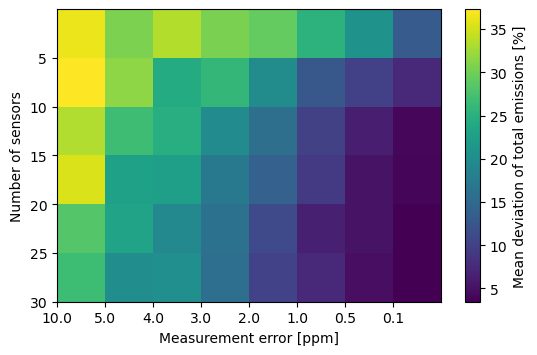

In [9]:
with plot_env(
    name="rmse",
    notes=exp.config,
):
    plt_exp.plot_pcm_rmse(
        env=plot_env,
        rmse_array=exp.data["rmse_array"],
        std_list=exp.data["std_list"],
        n_sensors_list=exp.data["n_sensors_list"],
    )


[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/information/config_log.yml'


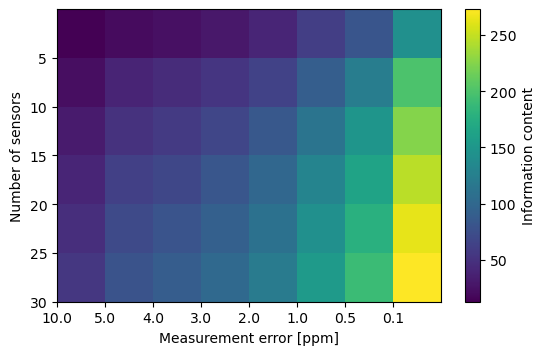

In [10]:
with plot_env(
    name="information",
    notes=exp.config,
):
    plt_exp.plot_pcm_information(
        env=plot_env,
        information=exp.data["information"],
        std_list=exp.data["std_list"],
        n_sensors_list=exp.data["n_sensors_list"],
    )
